In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('GOOG.csv')
data = df['close'].values.reshape(-1, 1)  
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [13]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [14]:
sequence_length = 20
X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [17]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0248 - val_loss: 0.0471
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0085
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6900e-04 - val_loss: 0.0013
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8950e-04 - val_loss: 0.0021
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3996e-04 - val_loss: 0.0012
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4024e-04 - val_loss: 9.4522e-04
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5132e-04 - val_loss: 9.6771e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3917e-04 - val_loss: 0.0012
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7492e-04 - val_loss: 0.0011
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6843e-04 - val_loss: 8.5058e-04
Epoch 12/100
31/31

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5066e-04 - val_loss: 0.0010
Epoch 67/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5588e-04 - val_loss: 8.9845e-04
Epoch 68/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1328e-04 - val_loss: 0.0012
Epoch 69/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8338e-04 - val_loss: 0.0012
Epoch 70/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6714e-04 - val_loss: 8.3327e-04
Epoch 71/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7838e-04 - val_loss: 9.9173e-04
Epoch 72/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5062e-04 - val_loss: 0.0011
Epoch 73/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9550e-04 - val_loss: 8.8721e-04
Epoch 74/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6414e-04 - val_loss: 0.0015
Epoch 75/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9337e-04 - val_loss: 9.3187e-04
Epoch 76/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5033e-04 - val_loss: 0.0013
Epo

In [8]:
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7000e-04 
Test Loss: 0.0006244321120902896
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


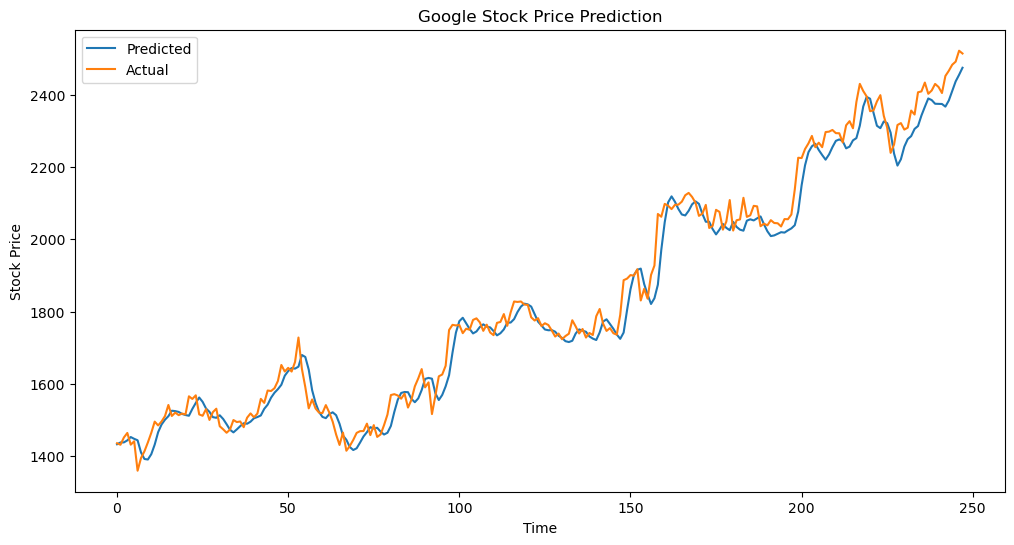

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()